In [1]:
from conway import Conway, ConwayParallel

  0%|          | 0/500 [00:00<?, ?it/s]

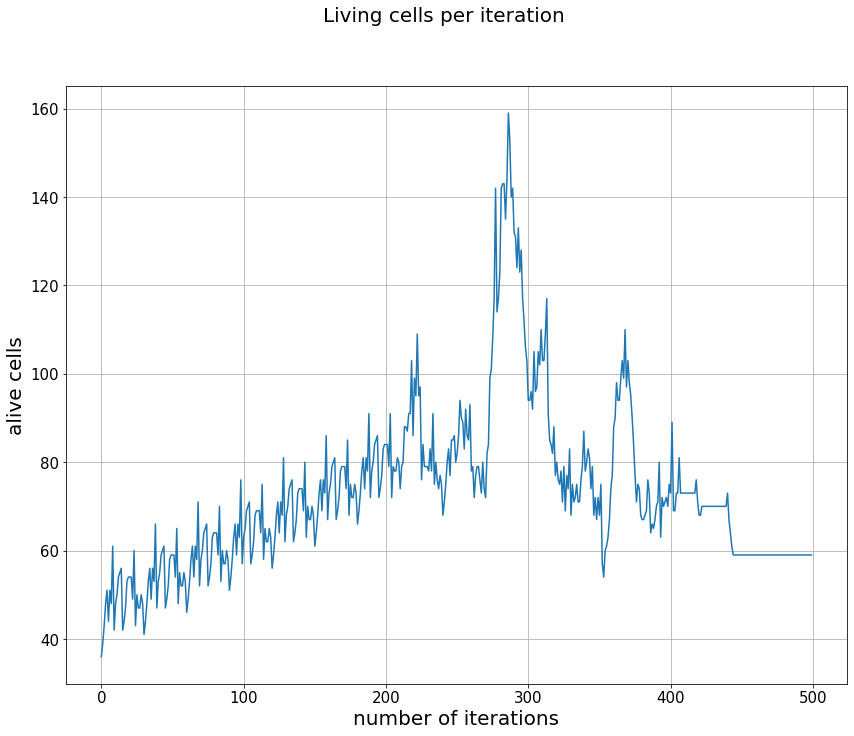

In [4]:
# GLIDER GUN

from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt

glider_gun =\
[[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]

X = np.zeros((50, 70))
X[1:10,1:37] = glider_gun

c = Conway(X)
for i in tqdm(range(500)):
    c.simulate(i, save_img=False)

fig = plt.figure(figsize=(14, 11))
plt.plot(range(500), c.alive_cells_array)
plt.xlabel('number of iterations', fontsize = 20)
plt.ylabel('alive cells', fontsize = 20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.suptitle('Living cells per iteration', fontsize = 20)
plt.grid(True)

  0%|          | 0/24 [00:00<?, ?it/s]

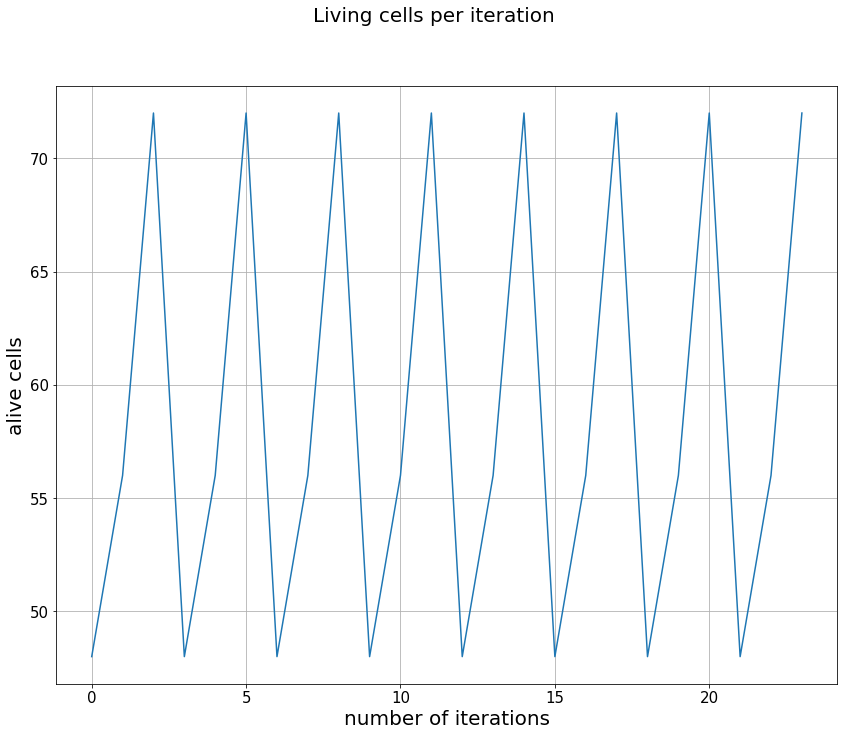

In [5]:
# PULSAR

X = np.zeros((17, 17))
X[2, 4:7] = 1
X[4:7, 7] = 1
X += X.T
X += X[:, ::-1]
X += X[::-1, :]


c = Conway(X)
for i in tqdm(range(24)):
    c.simulate(i, save_img=False)

fig = plt.figure(figsize=(14, 11))
plt.plot(range(24), c.alive_cells_array)
plt.xlabel('number of iterations', fontsize = 20)
plt.ylabel('alive cells', fontsize = 20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.suptitle('Living cells per iteration', fontsize = 20)
plt.grid(True)

  0%|          | 0/500 [00:00<?, ?it/s]

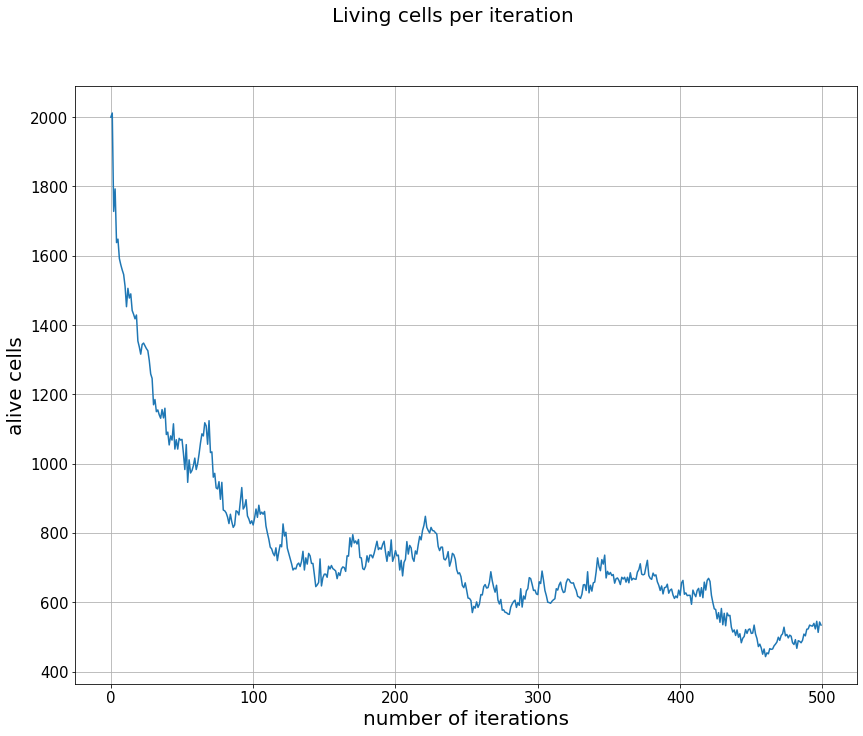

In [6]:
# RANDOM

from scipy.sparse import rand

X = rand(100, 100, density=0.2, format='csr')
X.data[:] = 1

X = X.todense()

c = Conway(X)
for i in tqdm(range(500)):
    c.simulate(i, save_img=False)

fig = plt.figure(figsize=(14, 11))
plt.plot(range(500), c.alive_cells_array)
plt.xlabel('number of iterations', fontsize = 20)
plt.ylabel('alive cells', fontsize = 20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.suptitle('Living cells per iteration', fontsize = 20)
plt.grid(True)

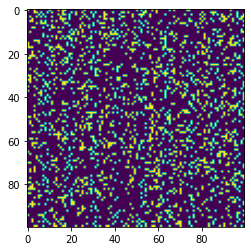

In [7]:
plt.imshow(X)

In [8]:
c = Conway(X)

In [ ]:
from tqdm import tqdm_notebook
import glob
import imageio

def create_path(path1):
    return f"/content/drive/MyDrive/Sk/HPPL/9. Conway's game of life/{path1}/*.png"

def save_gif(path2):
    return f"/content/drive/MyDrive/Sk/HPPL/9. Conway's game of life/{path2}.gif"

name = 'Random'

for i in tqdm_notebook(range(500)):
    c.simulate(i, save_img=True, name_folder=name)

end_path = create_path(name)
filenames = glob.glob(end_path)

images = []
for filename in tqdm_notebook(filenames):
    images.append(imageio.imread(filename))

imageio.mimsave(save_gif(name), images)
